# EDA 4 - Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import train data

df = pd.read_csv('../Data/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


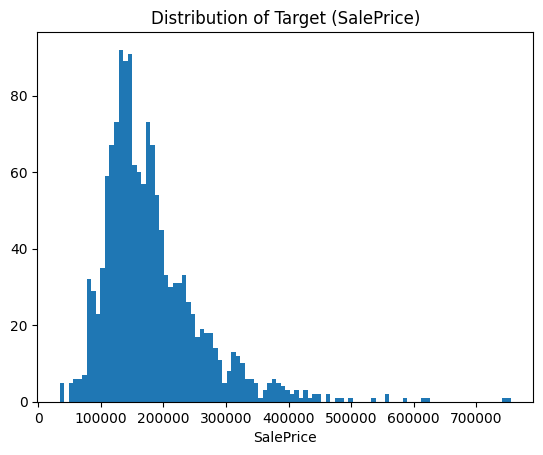

In [9]:
# plot the distribution of the target feature, SalePrice, to check if the distribution is normal

plt.hist(df['SalePrice'], bins=100);
plt.title('Distribution of Target (SalePrice)')
plt.xlabel('SalePrice');

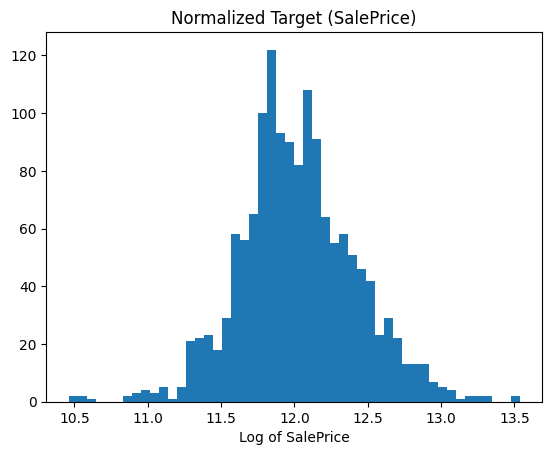

In [16]:
# the target feature is not normally distributed. To improve model performance, take the log to normalize the distribution

target_normalized = np.log(df['SalePrice'])

# plot the logged SalePrice to check new distribution

plt.hist(target_normalized, bins=50)
plt.title('Normalized Target (SalePrice)')
plt.xlabel('Log of SalePrice');

In [17]:
!pip install dython

  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.0
    Uninstalling psutil-5.9.0:
      Successfully uninstalled psutil-5.9.0


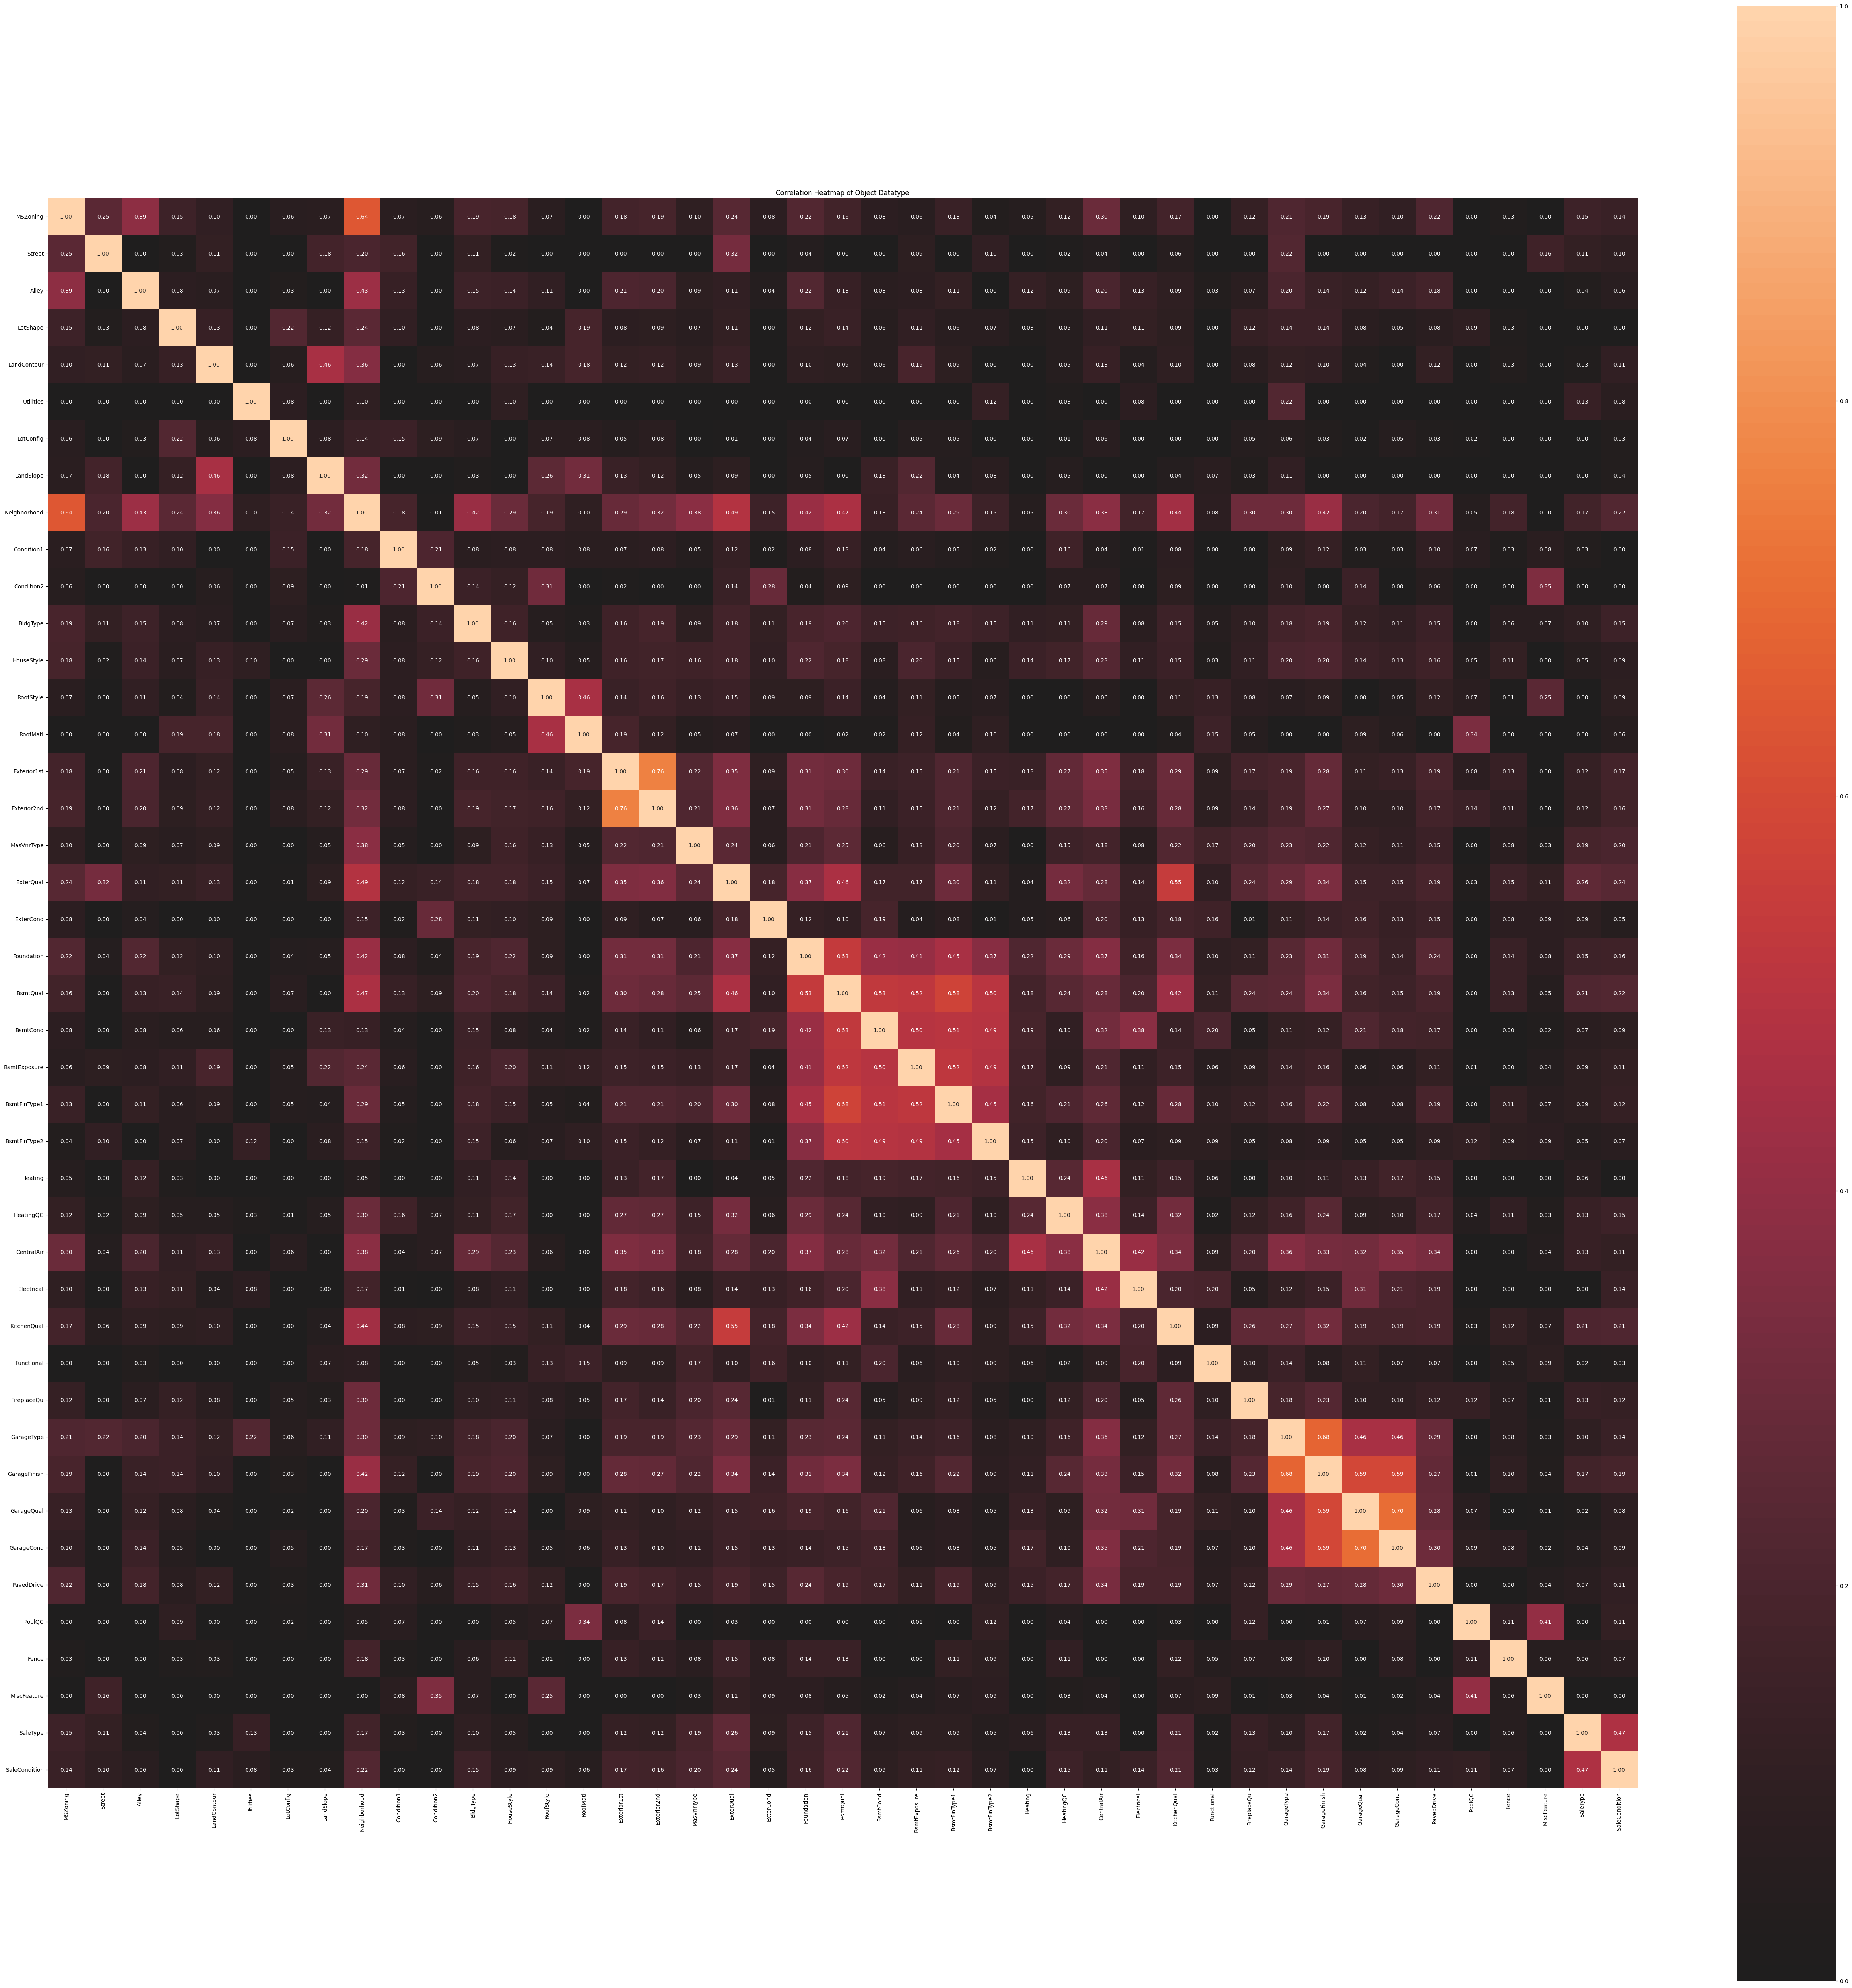

In [28]:
from dython.nominal import associations

associations(df.select_dtypes('object'), title='Correlation Heatmap of Object Datatype');

In [29]:
# calculate the correlations of all features to each other and save to dataframe

corr_all = associations(df, compute_only=True)['corr']

In [41]:
# sort by the highest correlation to SalePrice
# rename column names

sorted_corr = pd.DataFrame(corr_all['SalePrice'].abs().sort_values(ascending=False))
sorted_corr.columns = ['Corr to SalePrice']
sorted_corr = sorted_corr.reset_index().rename(columns = {'index':'Feature'})
sorted_corr

,Feature,Corr to SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,Neighborhood,0.738630
3,GrLivArea,0.708624
4,ExterQual,0.690933
...,...,...
76,Id,0.021917
77,MiscVal,0.021190
78,BsmtHalfBath,0.016844
79,Utilities,0.014314


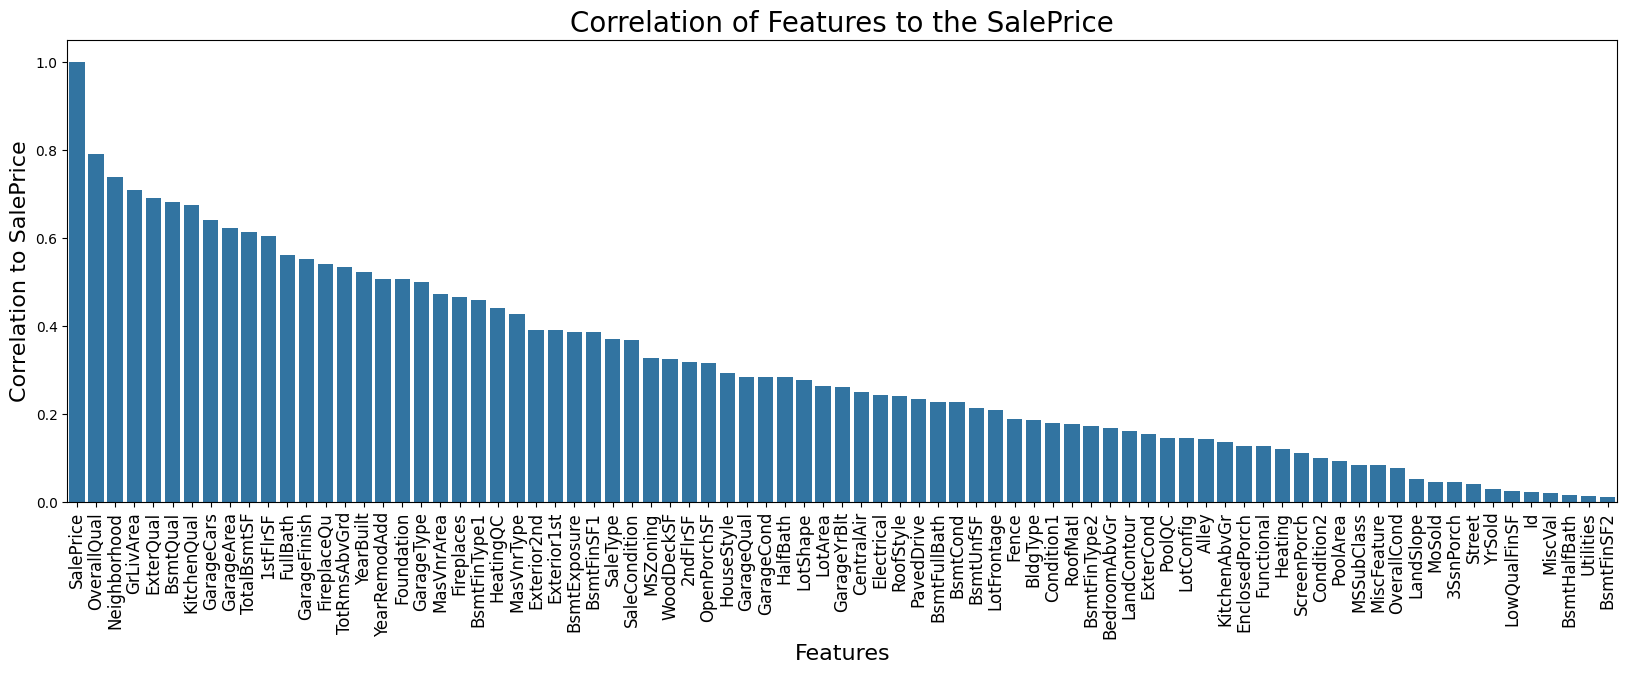

In [57]:
plt.figure(figsize=(20,6))
sns.barplot(data=sorted_corr,x='Feature',y='Corr to SalePrice')
plt.title('Correlation of Features to the SalePrice', fontsize=20)
plt.ylabel('Correlation to SalePrice', fontsize=16)
plt.xlabel('Features', fontsize=16)
plt.xticks(rotation=90, fontsize=12);

In [72]:
# checking for multicollinearity amongst the Garage-related features
# extract the list of columns that mention Garage

garage_columns = [col for col in df.columns if 'Garage' in col]
garage_columns

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

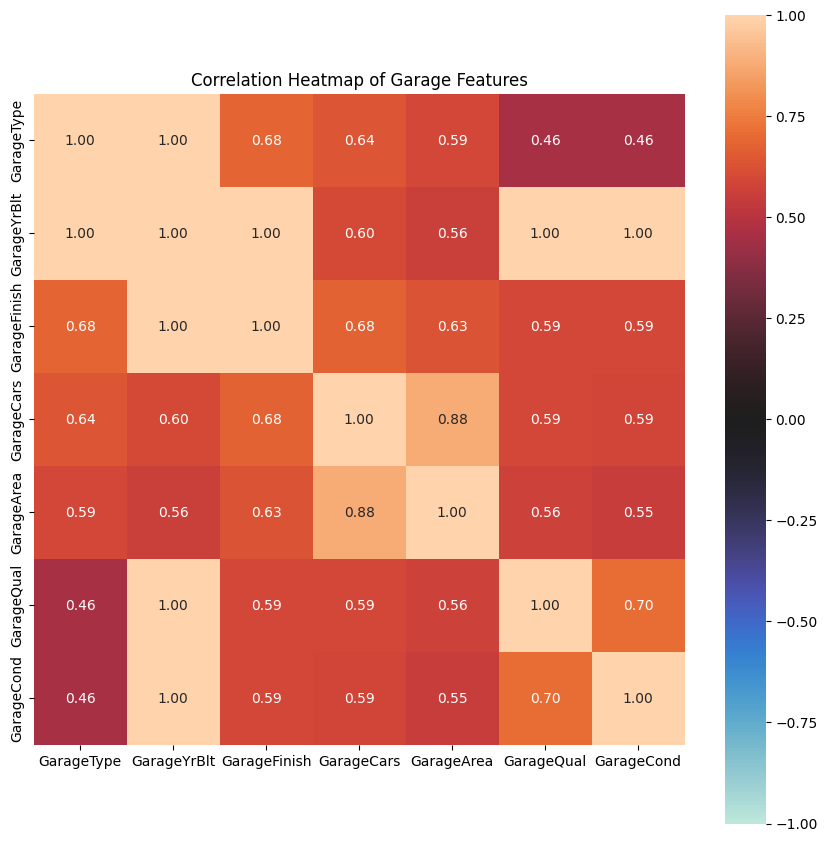

In [71]:
# check the correlation heatmap for only the Garage features

associations(df[garage_columns], title='Correlation Heatmap of Garage Features');

In [73]:
# checking for multicollinearity amongst the Basement-related features
# extract the list of columns that mention Basement

bsmt_columns = [col for col in df.columns if 'Bsmt' in col]
bsmt_columns

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

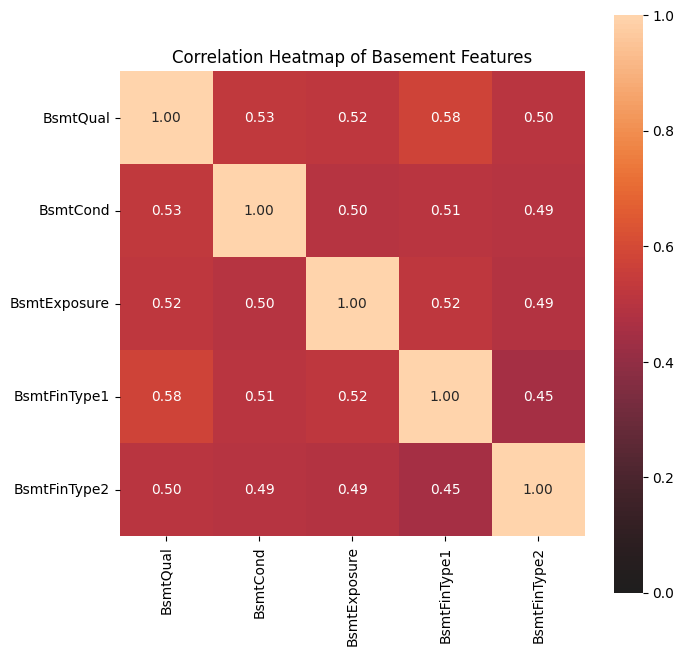

In [76]:
# check the correlation of the Basement features of the Object datatype

associations(df[bsmt_columns].select_dtypes('object'), title='Correlation Heatmap of Basement Features');